# Learning Curve

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

# Unzip digits dataset
import zipfile

# Specify the path to the zip file
zip_path = "datasets/Digits.zip"

# Specify the destination directory to extract the dataset
destination_dir = "datasets/Digits"

# Open the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extract all files to the destination directory
    zip_ref.extractall(destination_dir)


2023-05-28 04:05:46.996056: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-28 04:05:46.996078: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Read the .npy file
features = np.load('datasets/Digits/digits_pixels.npy')
targets = np.load('datasets/Digits/digits_target.npy')

In [3]:
features.shape, targets.shape

((1797, 64), (1797,))

In [4]:
features = features.astype(np.float32)
features

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], dtype=float32)

In [5]:
# Convert to DataFrame
digits_df = pd.DataFrame(targets)

In [6]:
targets = np.array(pd.get_dummies(digits_df[0]), dtype = np.float32)
targets

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [7]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, targets,
                                                   test_size=0.3, 
                                                   random_state=42)

In [8]:
# Total features
n_cols = features.shape[1]
n_cols

64

In [9]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Specifying the model
model_digit = Sequential()

# Add hidden layer
model_digit.add(Dense(50, activation='relu', input_shape=(n_cols,)))
model_digit.add(Dense(50, activation='relu'))

# Output layer
model_digit.add(Dense(10, activation='softmax'))

# Model summary
model_digit.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                3250      
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 6,310
Trainable params: 6,310
Non-trainable params: 0
_________________________________________________________________


2023-05-28 04:05:48.989720: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-28 04:05:48.989742: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-28 04:05:48.989759: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (444cdbd6-894b-448e-8c8e-9258d896b578): /proc/driver/nvidia/version does not exist
2023-05-28 04:05:48.989950: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
from tensorflow.keras.callbacks import History
from tensorflow.keras.callbacks import EarlyStopping

# Initiating EarlyStopping
monitor_val_accuracy = EarlyStopping(monitor='val_accuracy', patience=5)

# Create an instance of the History callback
history = History()

# Compile the model
model_digit.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model_digit.fit(X_train, y_train, 
                epochs=20, 
                validation_data=(X_test, y_test), 
                callbacks=[history])

Epoch 1/20
40/40 [==============================] - 0s 5ms/step - loss: 3.8769 - accuracy: 0.1933 - val_loss: 1.5171 - val_accuracy: 0.4648
Epoch 2/20
40/40 [==============================] - 0s 2ms/step - loss: 0.9767 - accuracy: 0.6953 - val_loss: 0.6284 - val_accuracy: 0.8167
Epoch 3/20
40/40 [==============================] - 0s 2ms/step - loss: 0.4268 - accuracy: 0.8735 - val_loss: 0.3882 - val_accuracy: 0.8852
Epoch 4/20
40/40 [==============================] - 0s 2ms/step - loss: 0.2562 - accuracy: 0.9260 - val_loss: 0.2874 - val_accuracy: 0.9204
Epoch 5/20
40/40 [==============================] - 0s 2ms/step - loss: 0.1819 - accuracy: 0.9515 - val_loss: 0.2418 - val_accuracy: 0.9315
Epoch 6/20
40/40 [==============================] - 0s 2ms/step - loss: 0.1390 - accuracy: 0.9618 - val_loss: 0.2024 - val_accuracy: 0.9370
Epoch 7/20
40/40 [==============================] - 0s 2ms/step - loss: 0.1109 - accuracy: 0.9674 - val_loss: 0.1807 - val_accuracy: 0.9426
Epoch 8/20
40/40 [==

In [11]:
# Access training history
loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

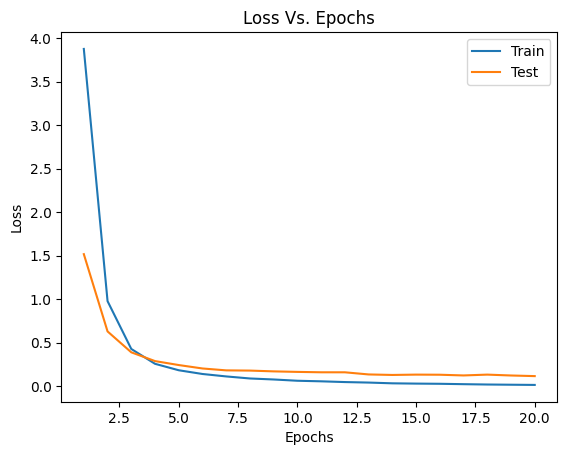

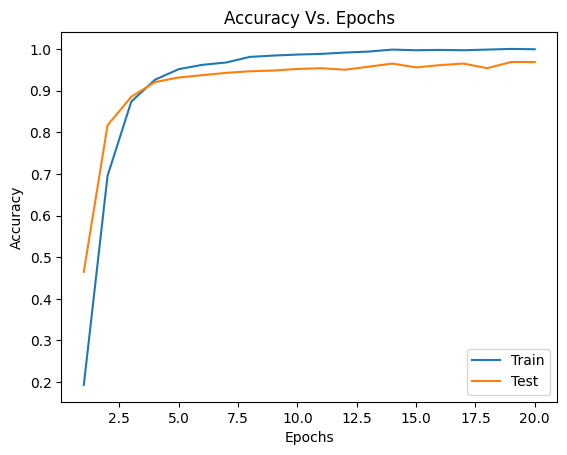

In [12]:
import matplotlib.pyplot as plt

# Plotting loss and accuracy on different epochs
plt.plot(np.arange(1,21), loss, label='Train')
plt.plot(np.arange(1,21), val_loss, label='Test')
plt.title('Loss Vs. Epochs')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(np.arange(1,21), accuracy, label='Train')
plt.plot(np.arange(1,21), val_accuracy, label='Test')
plt.title('Accuracy Vs. Epochs')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


# Batch normalization
![image-7](image-7.png)

In [13]:
# Comparing same model with Batch Normalization
from tensorflow.keras.layers import BatchNormalization

# Specifying the model
normalized_model = Sequential()

# Add hidden layers
normalized_model.add(Dense(50, activation='relu',input_shape=(n_cols,)))
normalized_model.add(BatchNormalization())

normalized_model.add(Dense(50, activation='relu'))
normalized_model.add(BatchNormalization())

# Add output layer
normalized_model.add(Dense(10, activation='softmax'))

# Model summary
normalized_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                3250      
                                                                 
 batch_normalization (BatchN  (None, 50)               200       
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 batch_normalization_1 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                                 
Total params: 6,710
Trainable params: 6,510
Non-traina

In [14]:
# Compile the model
normalized_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
normalized_model.fit(X_train, y_train, 
                epochs=20, 
                validation_data=(X_test, y_test))

Epoch 1/20
40/40 [==============================] - 1s 5ms/step - loss: 1.8185 - accuracy: 0.4097 - val_loss: 1.7399 - val_accuracy: 0.4889
Epoch 2/20
40/40 [==============================] - 0s 2ms/step - loss: 0.7324 - accuracy: 0.8099 - val_loss: 0.8539 - val_accuracy: 0.7444
Epoch 3/20
40/40 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.8854 - val_loss: 0.4812 - val_accuracy: 0.8815
Epoch 4/20
40/40 [==============================] - 0s 2ms/step - loss: 0.3389 - accuracy: 0.9212 - val_loss: 0.3244 - val_accuracy: 0.9185
Epoch 5/20
40/40 [==============================] - 0s 2ms/step - loss: 0.2637 - accuracy: 0.9411 - val_loss: 0.2506 - val_accuracy: 0.9389
Epoch 6/20
40/40 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.9570 - val_loss: 0.1958 - val_accuracy: 0.9611
Epoch 7/20
40/40 [==============================] - 0s 2ms/step - loss: 0.1787 - accuracy: 0.9578 - val_loss: 0.1719 - val_accuracy: 0.9537
Epoch 8/20
40/40 [==

Comparing both the model on same parameters excpet one with batch normalization and other with no batch normalization. Since the very first epoch, **normalized data performed better**.

# Batch Size
- Networks train faster (more weight updates in same amount of time)
- Less RAM memory required, can train on huge datasets

In [15]:
# Specifying the model
normalized_model = Sequential()

# Add hidden layers
normalized_model.add(Dense(50, activation='relu',input_shape=(n_cols,)))
normalized_model.add(BatchNormalization())

normalized_model.add(Dense(50, activation='relu'))
normalized_model.add(BatchNormalization())

# Add output layer
normalized_model.add(Dense(10, activation='softmax'))

# Model compile
normalized_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# With batch size equal to the number of records
normalized_model.fit(X_train, y_train, 
                batch_size=30,
                epochs=1,
                validation_data=(X_test, y_test))

42/42 [==============================] - 1s 5ms/step - loss: 1.6614 - accuracy: 0.4495 - val_loss: 1.4410 - val_accuracy: 0.5463


In [17]:
# Specifying the model
normalized_model = Sequential()

# Add hidden layers
normalized_model.add(Dense(50, activation='relu',input_shape=(n_cols,)))
normalized_model.add(BatchNormalization())

normalized_model.add(Dense(50, activation='relu'))
normalized_model.add(BatchNormalization())

# Add output layer
normalized_model.add(Dense(10, activation='softmax'))

# Model compile
normalized_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Without batch size
normalized_model.fit(X_train, y_train, 
                 epochs=1,
                validation_data=(X_test, y_test))

40/40 [==============================] - 1s 5ms/step - loss: 1.9622 - accuracy: 0.3429 - val_loss: 1.9456 - val_accuracy: 0.3019


Comparing model fitting with and without batch size, **the one with batch size parameter, performed better**. Because:
- the one with batch size parameter, in each epoch the data is trained for every batch separately and thus the weight is updated at each batch training. So, for each epoch, there are more than 1 iteration based on batch size. Here, in each epoch there are around 60 iterations.
- the one without batch size parameter, for each epoch whole data is trained all at one and so the weights are updated only once. Hence, there is only one iteration in each epoch.

# Acivation Function
![image-6](image-6.png)


In [19]:
# Read irrigation data
irrigation = pd.read_csv('datasets/irrigation_machine.csv')
irrigation.head()

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,1.0,3.0,6.0,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,3.0,2.0,2.0,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,3.0,2.0,4.0,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,3.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,4.0,5.0,3.0,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [20]:
# Features and labels
sensors = np.array(irrigation.drop(['Unnamed: 0','parcel_0','parcel_1','parcel_2'],axis=1), dtype=np.float32)

parcels = np.array(irrigation[['parcel_0','parcel_1','parcel_2']])

In [21]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(sensors, parcels,
                                                   test_size=0.3, 
                                                   random_state=42)

In [22]:
# Define model function 
def get_model(activation):
    # Specifying model
    model_irrigation = Sequential()

    # Add hidden layer
    model_irrigation.add(Dense(64, activation=activation, input_shape=(20,)))

    # Output layer
    model_irrigation.add(Dense(3, activation='sigmoid')) # because multi-label classification
    
    # Compile the model
    model_irrigation.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model_irrigation

In [23]:
# Activation functions to try
activations = ['relu', 'leaky_relu', 'sigmoid', 'tanh']

# Loop over the activation functions
activation_results = {}

for act in activations:
  # Get a new model with the current activation
  model = get_model(act)
  # Fit the model and store the history results
  h_callback = model.fit(X_train,y_train, epochs=20, validation_data=(X_test, y_test), verbose=0)
  activation_results[act] = h_callback


In [24]:
activation_results

{'relu': <keras.callbacks.History at 0x7fcb18a5edc0>,
 'leaky_relu': <keras.callbacks.History at 0x7fcb18930250>,
 'sigmoid': <keras.callbacks.History at 0x7fcb1883de80>,
 'tanh': <keras.callbacks.History at 0x7fcb187e0ee0>}

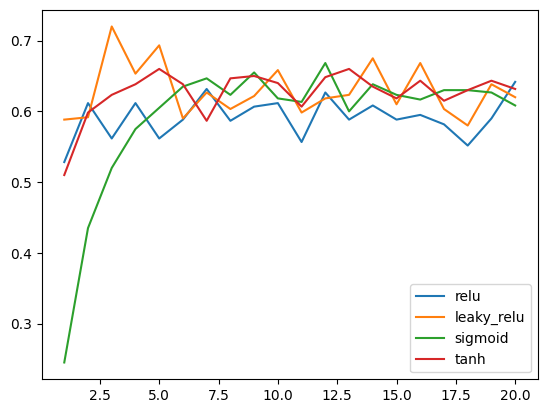

In [25]:
# Plot val_accuracy for different activation function
plt.plot(np.arange(1,21), activation_results['relu'].history['val_accuracy'], label='relu')
plt.plot(np.arange(1,21), activation_results['leaky_relu'].history['val_accuracy'], label='leaky_relu')
plt.plot(np.arange(1,21), activation_results['sigmoid'].history['val_accuracy'], label='sigmoid')
plt.plot(np.arange(1,21), activation_results['tanh'].history['val_accuracy'], label='tanh')

plt.legend()
plt.show()

# Hyperparameter Tuning
- Turn a Keras model into a Sklearn estimator
- Random search on keras model

In [26]:
banknotes = pd.read_csv('datasets/banknotes.csv')
banknotes.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [27]:
# Features and labels
X = np.array(banknotes.drop('class', axis=1), dtype=np.float32)
y = np.array(banknotes['class'], dtype=np.float32)

In [28]:
# Split into Train-Test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.3,
                                                   random_state=42)

In [29]:
# Creates a model given an activation and learning rate
def create_model(learning_rate, activation):
  
  	# Create an Adam optimizer with the given learning rate
  	opt = Adam(lr = learning_rate)
  	
  	# Create your binary classification model  
  	model = Sequential()
  	model.add(Dense(16, input_shape = (4,), activation = activation))
  	model.add(Dense(16, activation = activation))
  	model.add(Dense(1, activation = 'sigmoid'))
  	
  	# Compile your model with your optimizer, loss, and metrics
  	model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
  	return model

In [ ]:
# Import RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Import KFold
from sklearn.model_selection import KFold

# Import KerasClassifier from tensorflow.keras scikit learn wrappers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Import Adam optimizer
from tensorflow.keras.optimizers import Adam

# Create a KerasClassifier
model = KerasClassifier(build_fn = create_model)

# Define the parameters to try out
params = {'activation': ['relu', 'tanh'], 'batch_size': [32, 128, 256],
          'epochs': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]}

# Create a randomize search cv object passing in the parameters to try
random_search = RandomizedSearchCV(model, param_distributions = params, cv = KFold(3))

# Running random_search.fit(X,y) would start the search,but it takes too long! 
random_search.fit(X,y)

Epoch 1/50
29/29 [==============================] - 0s 945us/step - loss: 0.0688 - accuracy: 0.9628
Epoch 2/50
29/29 [==============================] - 0s 916us/step - loss: 0.0121 - accuracy: 0.9967
Epoch 3/50
29/29 [==============================] - 0s 917us/step - loss: 0.0047 - accuracy: 0.9989
Epoch 4/50
29/29 [==============================] - 0s 872us/step - loss: 4.9569e-04 - accuracy: 1.0000
Epoch 5/50
29/29 [==============================] - 0s 838us/step - loss: 1.4259e-04 - accuracy: 1.0000
Epoch 6/50
29/29 [==============================] - 0s 850us/step - loss: 7.5971e-05 - accuracy: 1.0000
Epoch 7/50
29/29 [==============================] - 0s 860us/step - loss: 5.7955e-05 - accuracy: 1.0000
Epoch 8/50
29/29 [==============================] - 0s 865us/step - loss: 4.5609e-05 - accuracy: 1.0000
Epoch 9/50
29/29 [==============================] - 0s 874us/step - loss: 3.8057e-05 - accuracy: 1.0000
Epoch 10/50
29/29 [==============================] - 0s 874us/step - loss: 3

In [35]:
# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'learning_rate': 0.1, 'epochs': 50, 'batch_size': 32, 'activation': 'tanh'}
